# Testings of Robhook

This code is the one in extract from the module RobhootDIpy. 

## Change following cell to a code that does the job and exemplifies the functions in RobhootDIpy.extract

In [ ]:
import requests
import grequests
import urllib.request
import os

# Download from source

#!/usr/bin/env python3

#DISCOVER 

#API request ============================================================
#Test :: making request does not work
response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")

#_____________________________________________________________________________________________________________________________________________________
#200: Everything went okay, and the result has been returned (if any).
#301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
#400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
#401: The server thinks you’re not authenticated. Many APIs require login credentials, so this happens when you don’t send the right credentials to access an API.
#403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
#404: The resource you tried to access wasn’t found on the server.
#503: The server is not ready to handle the request.
#_____________________________________________________________________________________________________________________________________________________


#Test : making request that work
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)
#200
#------------------------------------------------------------------------


#Option 1
urls = [
    'http://www.heroku.com',
    'http://tablib.org',
    'http://httpbin.org',
    'http://python-requests.org',
    'http://kennethreitz.com'
]

   rs = (grequests.get(u) for u in urls)
   grequests.map(rs)

#Option 2
def main():
# open a connection to a URL using urllib2
   webUrl = urllib2.urlopen("https://www.youtube.com/user/guru99com")

#get the result code and print it
   print("result code:" + str(webUrl.getcode())) 

# read the data from the URL and print it
    data = webUrl.read()
    print(data)
#==========================================================================



#Making connection to where is the data to the http request below


#EXTRACT 
# http request 
#download data request

#interesting
http://hdr.undp.org/en/data


urls = ['https://www.worldpop.org/sdi/advancedapi',#worldpop
        'https://gadm.org/download_world.html',#boundaries
        'http://www.migrationpolicycentre.eu/globalmobilities/dataset/',#transnational mobility
        'https://www.gisaid.org/epiflu-applications/next-hcov-19-app/',
        'https://covid2019-api.herokuapp.com/v2/current',
        'https://envidatrepo.wsl.ch/uploads/chelsa/',
        'https://millionneighborhoods.org/#2.45/25.19/23.79',
        'https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11'
       ]

import os
import requests
from mimetypes import guess_extension
def download_file(url,path = './data'):
    """
    download_file function:
        This function downloads the resource from a server and places it in your local folder.
    Inputs:
    
        >> url: URL of the desired resource to download.
        >> path (optional): path where the resource will be stored. 
                       By default it is stored in the folder ./data/
    Returns:
    
        << status: status of the request. 200 is OK.
   
    """
    sread = requests.get(url,allow_redirects=True)
    status = sread.status_code
    if sread:
        print('Success! Downloading...(%s)' % url)
        header = sread.headers
        ext = guess_extension(sread.headers['content-type'].partition(';')[0].strip())
        #HERE WE NEED TO CHECK IF IT IS AN HTML/HTM TO CHECK THE LINKS INSIDE AND SEE IF IT IS A RESOURCE OR NOT
        if ext in ['html', 'htm']:
            # get links as urls2
            for urls in urls2:
                download_file(url)
        else:        
            fname = '_'.join(url.split('/')[2:]).replace('.','_')+ext
            pathFname = path + '/' + fname
            # Check if directory at path exists and create it if it does not exist
            if not os.path.exists(path):
                os.makedirs(path)
            # TO DO (NOT OVERWRITE DATA WITH POTENTIALLY DIFFERENT DATA FROM THE SAME URL THAT COULD BE UPDATED)
            # Here we would need a pipeline to update/save the data so that we do not overwrite data already downloaded
            #elif os.path.isfile(pathFname):
                #fname = '_'.join(url.split('/')[2:]).replace('.','_')+'0'+ext
                #pathFname = path + '/' + fname
            print('Saving in '+pathFname)
            open(pathFname,'wb+').write(sread.content)
    else:
        print('An error has occurred with status code %i' % status)
    return status

for url in urls:
    download_file(url)   

 

 ###### CODE FOR ENVIRONMENTAL DATA, DIRECTORY

from bs4 import BeautifulSoup,SoupStrainer
url='https://envidatrepo.wsl.ch/uploads/chelsa/'

#### Return [False,[]] if it is not html
#### Return [True,[list of links]] if it is html

def getlinks(sread):
    """
    getlinks function:
        This function gets the links that can be found in the url to which the request sred is a response.
    Inputs:
        >> sread: Response of a request
    Outputs:
        << links: List of links inside that url
    """
    links=[]
    for link in BeautifulSoup(sread.content, "html.parser", parse_only=SoupStrainer('a', href=True)):
        links.append(link['href'])
#      for link in soup.findAll('a', attrs = {'href': re.compile("^http://")}):
#        links.append(link.get('href'))
    return links



def check_html(url):
    """
    check_html function:
        This function checks if the url points to an html document and asks for the links inside if it is true.
    Inputs:
        >> url: url that we want to check
    Outputs:
        << l: list with 2 entries. The first is a Boolean variable 
                l[0] = False, not html and l[1] = []
                l[1] = True, html and l[1] = list of links inside that url
    """
    sread = requests.get(url,allow_redirects=True)
    ####Problems with files in format '.7z' and '.lnk', cannot guess_extension
    if url[-3:]=='.7z':
        return([False,[]])
    elif url[-4:]=='.lnk':
        return([False,[]])
    else:
        ext = guess_extension(sread.headers['content-type'].partition(';')[0].strip())
        if ext not in ['.html', '.htm']:
            return([False,[]])
        else:
            return([True,getlinks(sread)])




max_depth =5  ###Maximum depth we will look from the parent directory
dout = [[] for i in range(max_depth+1)]
dout[0] = [url]
to_download = []
problems=['/uploads/','?C=N;O=D','?C=N;O=D','?C=M;O=A','?C=D;O=A','?C=S;O=A']
for i in range(1,max_depth+1,1):
    for link in dout[i-1]:
#        print(link)
        d = check_html(link)
        if d[0] == False:
            to_download.append(link)###Append to the list of downloads
        else:
            l0=link.replace('https://envidatrepo.wsl.ch','')
            for elem in d[1]:
                if elem in l0:#Avoid moving to previous depths
                    d[1].remove(elem)          
            for elem in problems:#Avoid strange links
                if elem in d[1]:
                    d[1].remove(elem)
            for j in range(len(d[1])):
                d[1][j]=link+d[1][j]
            dout[i] += d[1]###Add all the subdirectories to check in next depth level


####Now we have a list of links to download         
for link in to_download:
    download_file(link)

# Data for RobSIR 1.0

## CAUTION: WE NEED TO IMPLEMENT THE FOLLOWING CELLS THAT READ DATA AND PUT IT IN THE FORMAT FOR ROBSIR WITH [PANDAS](https://pandas.pydata.org/) TO BE MORE EFFICIENT

### Country ISO codes

I will do everything with the codes that describe the country with three letters (Alpha-3 codes).

Source: [World population review](https://worldpopulationreview.com/countries/country-codes/) They say that the codes come from the [International Organization for Standardization](https://www.iso.org/iso-3166-country-codes.html) but this organization charges for a csv of their codes.

In [53]:
fin = open('./Descargas/country_ISO_codes.csv')
country_code ={}
for line in fin:
    line = line.split(',')
    if line[0].split('"')[1] != 'name':
        country_number = int(line[3].split('"')[1])
        ccode = line[2].split('"')[1]
        country_code[country_number] = ccode

### Population estimates

Source: [UN World Population Prospects 2019](https://population.un.org/wpp/Download/Standard/Population/). I did already choose the columns and rows that I wanted, but, again, this should be done via [pandas](https://pandas.pydata.org/).

In [54]:
fin = open('./Descargas/population_estimates_UN_2020.csv')
pop = {}
for line in fin:
    line = line.split(',')
    if line[0] != '"Region':
        if len(line) < 5:
            #print(line)
            country_number = int(line[1])
            if country_number in country_code.keys():
                aux = line[2].split('"')
                if len(aux) == 1:
                    cpop = int(aux[0])*1000
                else:
                    cpop = int(aux[1])*1000
                if len(line) == 4:
                    aux = line[3].split('"')[0]
                    temp = '{:<03}'
                    res = temp.format(aux)
                    cpop += int(res            )
                pop[country_code[country_number]] = cpop
                #print(country_number, country_code[country_number], cpop)
            #else:
                #print(line)

### Mobility network

Source: [European comission Global Transnational Mobility Dataset](https://ec.europa.eu/knowledge4policy/node/35849_es). It has mobility between countries (directed) in number of trips for a year between 2011 and 2016. Just keeping the 2016 one. It is not completely symmetric, so we can think if we want to symmetrize it. Here I am storing it as a networkx directed graph. For storing I would use an edgelist although robsir is expecting a square matrix.

In [56]:
import networkx as nx
g = nx.DiGraph()
fin = open('./Descargas/KCMD_DDH_data_KCMD-EUI_GMP_Estimated_trips.csv')
for line in fin:
    line = line.split(',')
    if line[0] != 'reporting country':
        fr = line[0]
        to = line[1]
        year = int(line[2])
        if year == 2016:
            if fr in pop.keys() and to in pop.keys():
                flux = int(line[3])
                g.add_edge(fr, to, weight = flux)

### Epidemic data

The epidemic data is taken from the [Johns Hopkins CSSE repository](https://github.com/CSSEGISandData/COVID-19). Three tables for [confirmed](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv), [deaths](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv) and [recovered](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv). Recovered will disappear from this dataset.

Alternative source which seems to have alreade the county data for the USA is [coronascraper](https://coronadatascraper.com/#home).

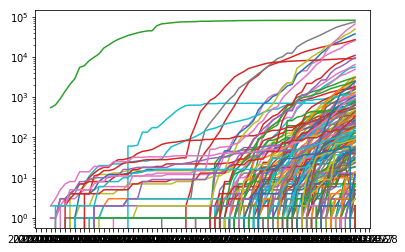

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

fin = open('./Descargas/time_series_covid19_confirmed_global.csv')
confirmed_ts = {}
for line in fin:
    line = line.split(',')
    if line[0] == 'Province/State':
        totlen = len(line)
        t = [line[i].rstrip('\n') for i in range(4,len(line))]
    else:
        if len(line) == totlen:
            if line[1] not in confirmed_ts.keys():
                confirmed_ts[line[1]] = np.array([int(line[i]) for i in range(4,len(line))])
            else:
                confirmed_ts[line[1]] += np.array([int(line[i]) for i in range(4,len(line))])
        else:
            country = line[1]+','+line[2]
            if line[1] not in confirmed_ts.keys():
                confirmed_ts[line[1]] = np.array([int(line[i]) for i in range(5,len(line))])
            else:
                confirmed_ts[line[1]] += np.array([int(line[i]) for i in range(5,len(line))])

for country in confirmed_ts.keys():
    plt.yscale('log')
    plt.plot(t, confirmed_ts[country])


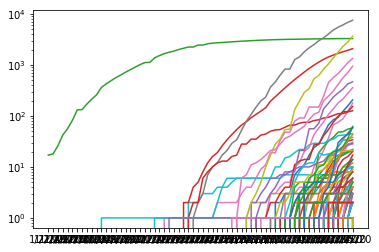

In [59]:
fin = open('./Descargas/time_series_covid19_deaths_global.csv')
deaths_ts = {}
for line in fin:
    line = line.split(',')
    if line[0] == 'Province/State':
        totlen = len(line)
        t = [line[i].rstrip('\n') for i in range(4,len(line))]
    else:
        if len(line) == totlen:
            if line[1] not in deaths_ts.keys():
                deaths_ts[line[1]] = np.array([int(line[i]) for i in range(4,len(line))])
            else:
                deaths_ts[line[1]] += np.array([int(line[i]) for i in range(4,len(line))])
        else:
            country = line[1]+','+line[2]
            if line[1] not in deaths_ts.keys():
                deaths_ts[line[1]] = np.array([int(line[i]) for i in range(5,len(line))])
            else:
                deaths_ts[line[1]] += np.array([int(line[i]) for i in range(5,len(line))])

for country in deaths_ts.keys():
    plt.yscale('log')
    plt.plot(t, deaths_ts[country])

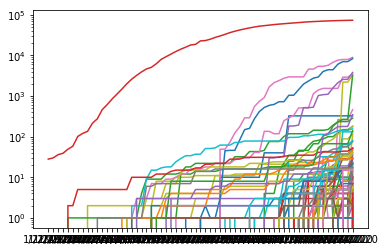

In [62]:
fin = open('./Descargas/time_series_covid19_recovered_global.csv')
recovered_ts = {}
for line in fin:
    line = line.split(',')
    if line[0] == '\ufeffProvince/State':
        #print(line)
        totlen = len(line)
        t = [line[i].rstrip('\n') for i in range(4,len(line))]
    else:
        if len(line) == totlen:
            if line[1] not in recovered_ts.keys():
                recovered_ts[line[1]] = np.array([int(line[i]) for i in range(4,len(line))])
            else:
                recovered_ts[line[1]] += np.array([int(line[i]) for i in range(4,len(line))])
        else:
            country = line[1]+','+line[2]
            if line[1] not in recovered_ts.keys():
                #print(line)
                recovered_ts[line[1]] = np.array([int(line[i]) for i in range(5,len(line))])
            else:
                recovered_ts[line[1]] += np.array([int(line[i]) for i in range(5,len(line))])

for country in recovered_ts.keys():
    plt.yscale('log')
    plt.plot(t, recovered_ts[country])